In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset
original_dataset = pd.read_csv('train.csv')
usml_dataset = original_dataset.drop(columns=['IsDefault'])
print(usml_dataset.shape)
original_dataset.head()

(1442, 61)


,Stock code,Z-SCORE,Share pledge ratio of controlling shareholders,Pledge ratio of limited sale shares,Pledge ratio of unlimited shares,Stock Volatility,P/E ratio,P/B ratio,Stock price rise and fall in the last year,Annual turnover rate,...,Debt financing costs,Enterprise age,Goodwill impairment ratio,Asset quality index,SG&A Expense,Number of key audit matters,Number of research institutions concerned,Number of research reports (+1 LN),Financial cycle m2/gdp,IsDefault
0,X00001,2.420039,0.152395,0.000000,0.126366,49.318786,31.40618754,3.658663,-0.366077,1.420614,...,-0.020707,11.258333,0.000000,1.212208,1.158201,1,3.688879,5.505332,0.028941,0
1,X00002,3.844693,0.608351,0.014874,0.159443,48.390237,30.42292058,5.460896,-0.133857,2.676361,...,0.026496,9.166667,-0.000210,1.058507,1.021779,1,3.496508,5.332719,-0.059096,0
2,X00003,4.975553,0.499388,0.000000,0.153660,46.639579,106.732585,3.636306,-0.304963,5.589544,...,0.018959,10.175000,-0.000052,1.138692,1.260414,2,3.784190,5.318120,-0.067378,0
3,X00004,4.088897,0.000000,0.000000,0.001285,31.025124,12.81982971,3.392250,0.906496,2.538287,...,-0.001030,16.494444,-0.000043,0.929914,0.856676,2,3.663562,5.252273,-0.064161,0
4,X00005,14.464241,0.332566,0.232977,0.014730,41.572718,94.0221809,65.671415,0.986821,3.692384,...,0.042445,9.391667,0.000000,0.524995,0.981006,1,3.583519,5.135798,0.048155,0


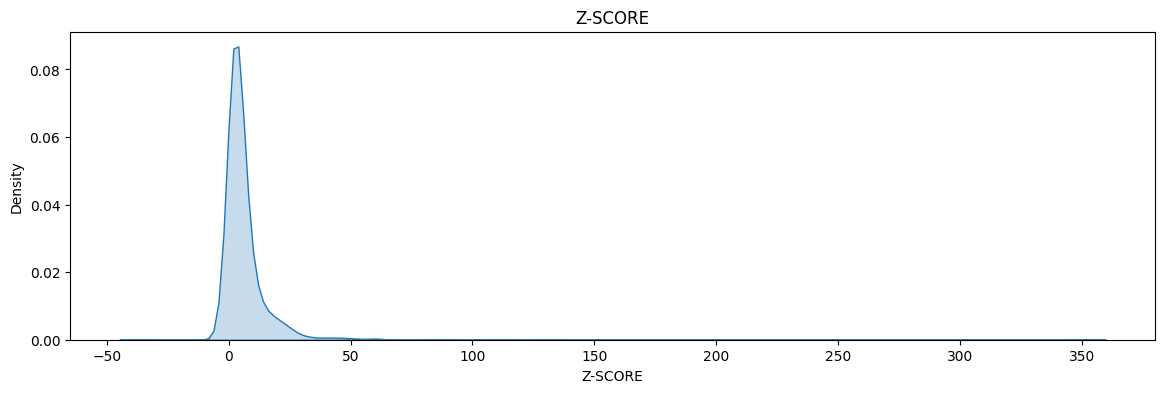

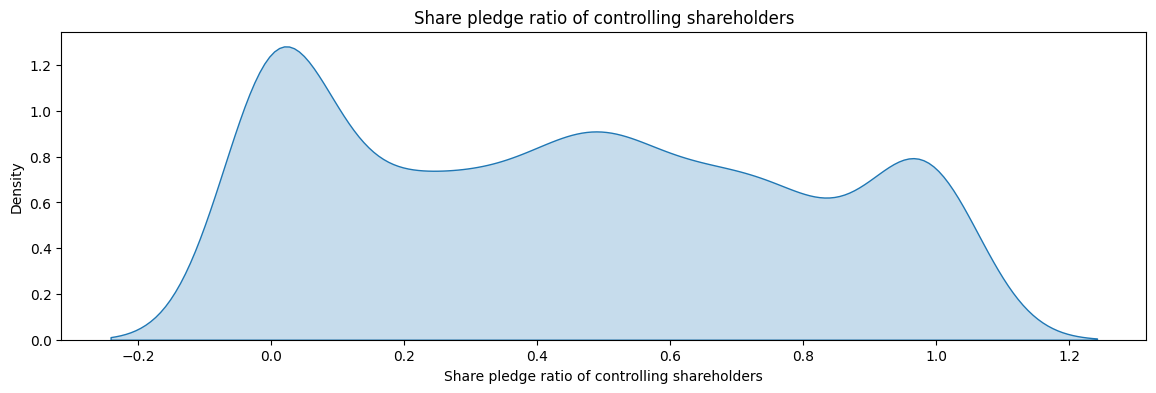

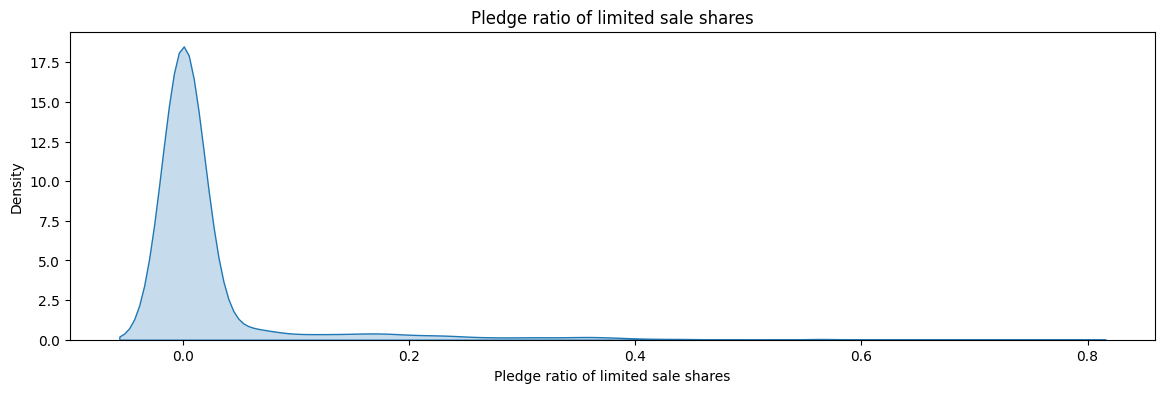

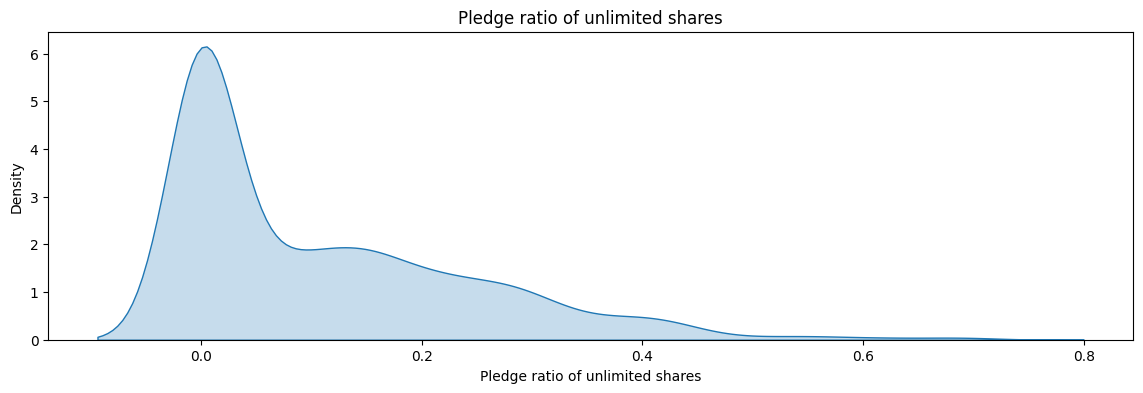

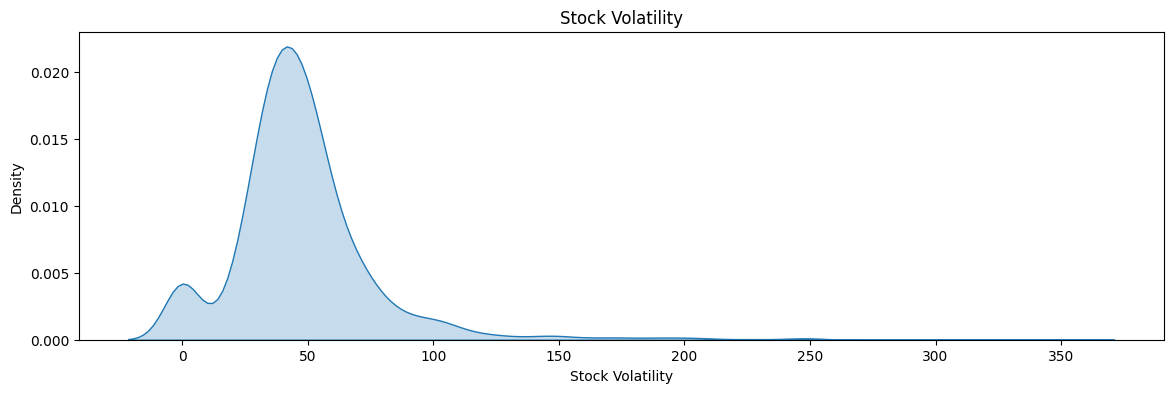

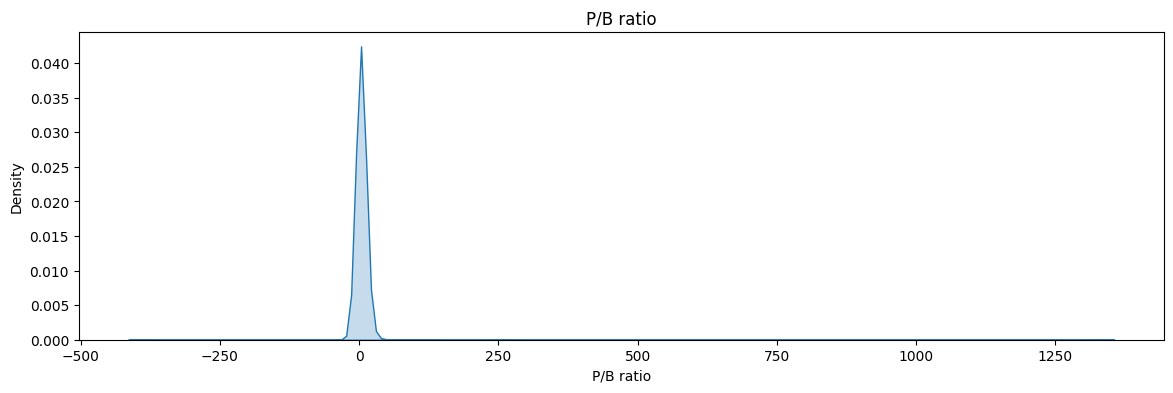

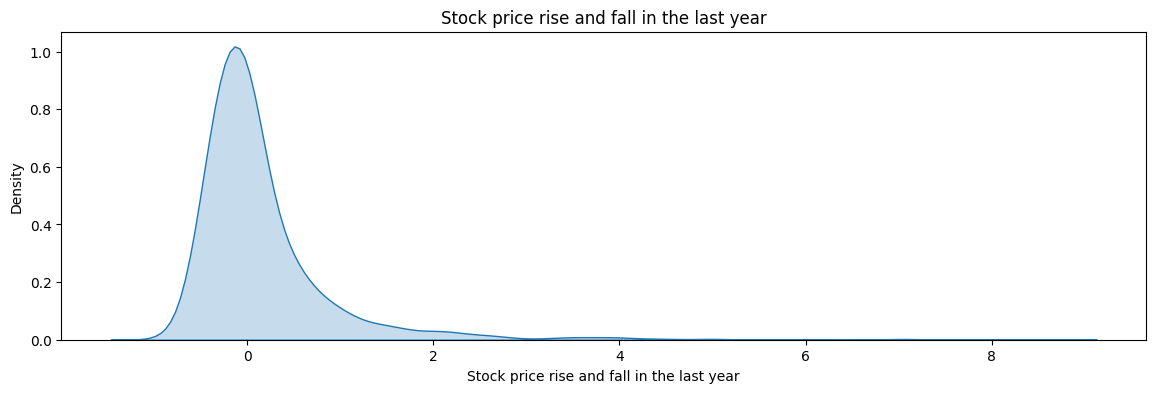

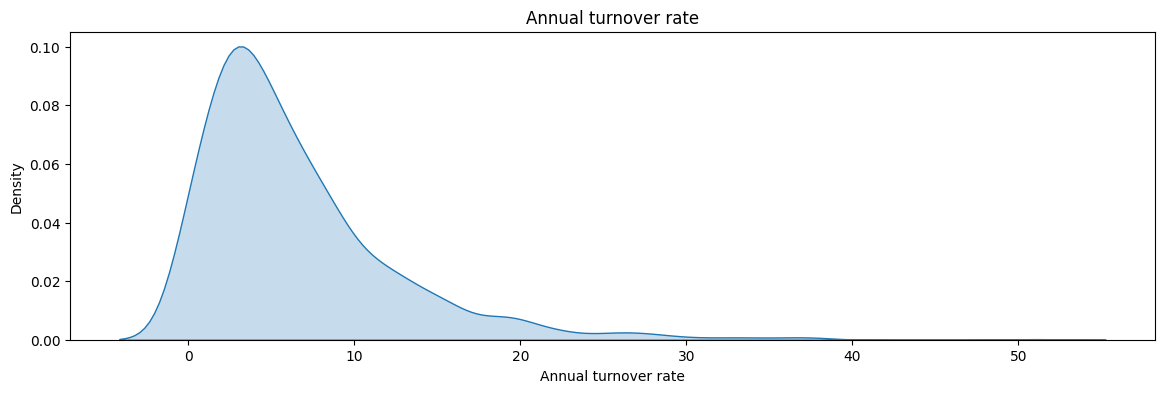

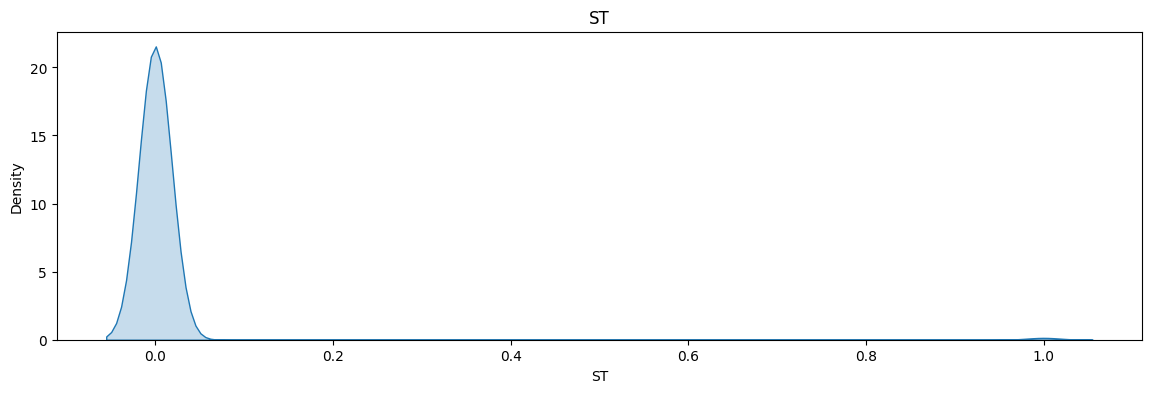

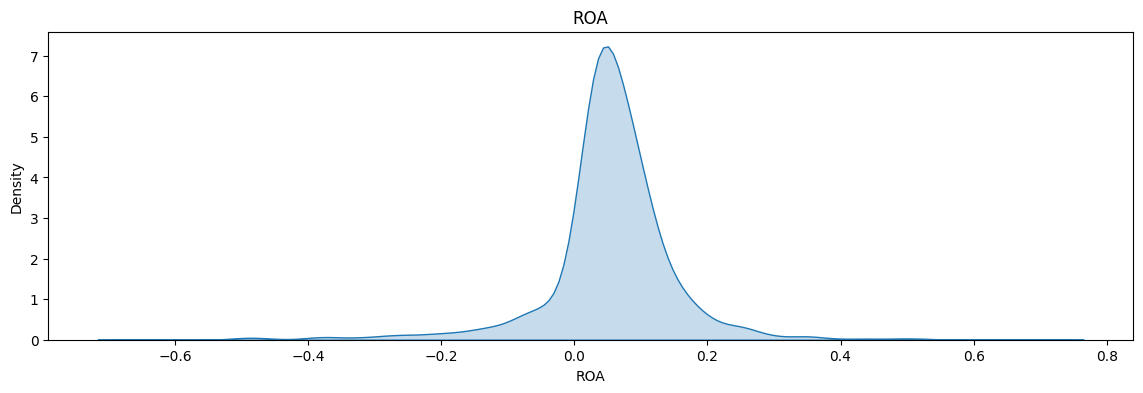

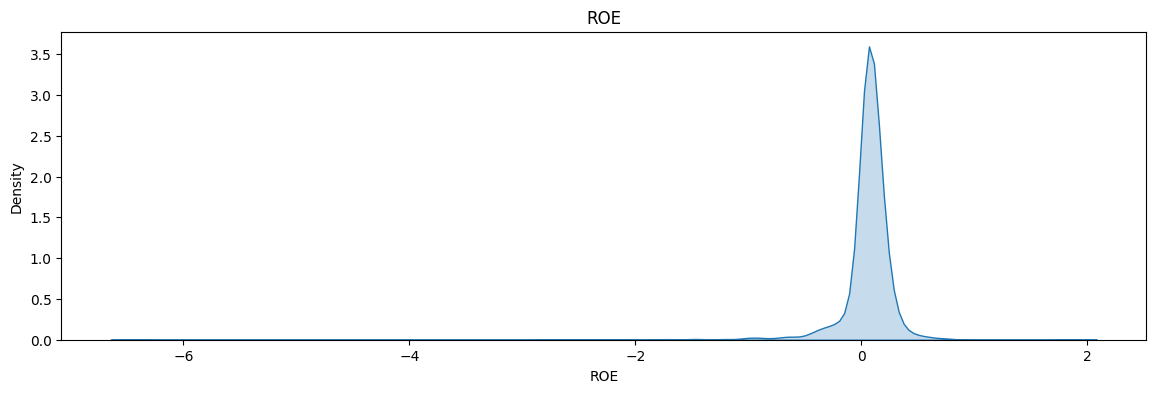

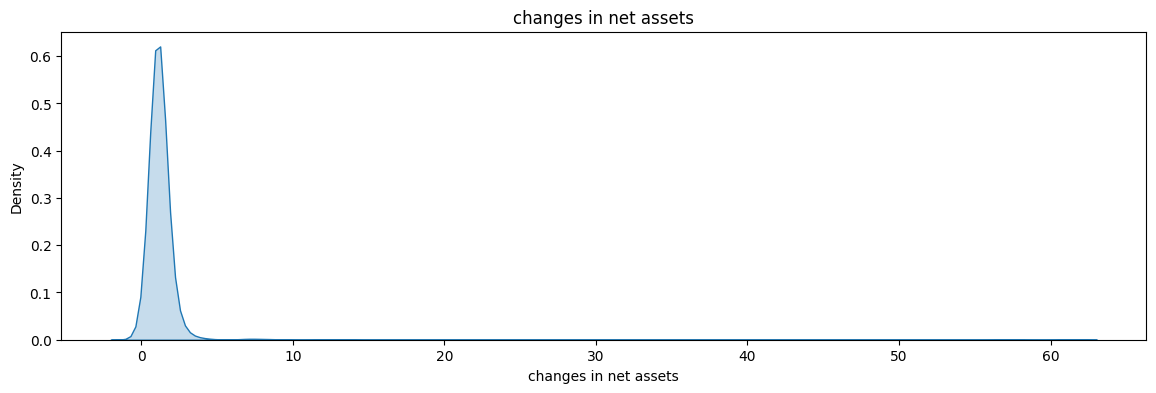

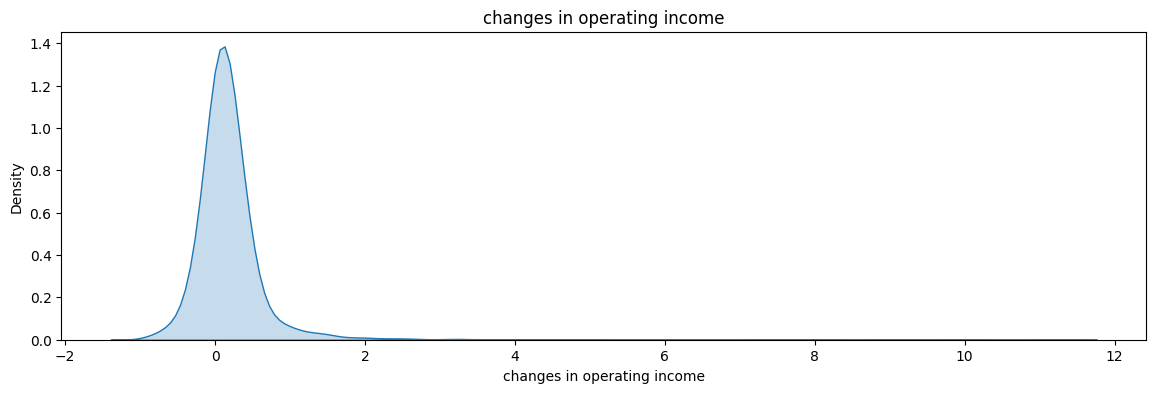

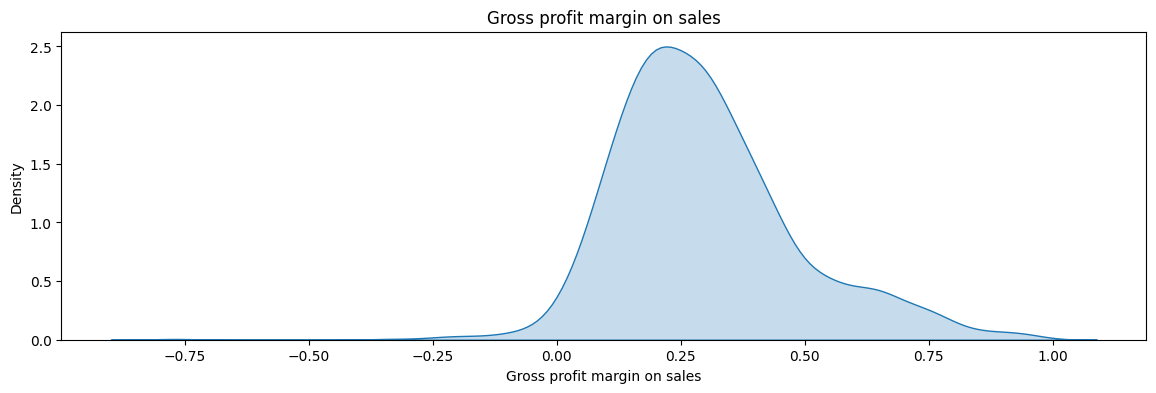

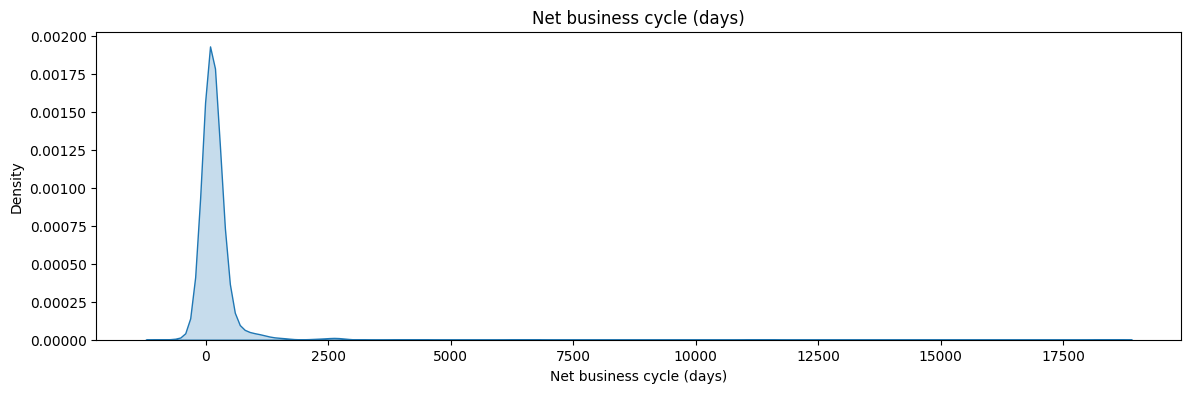

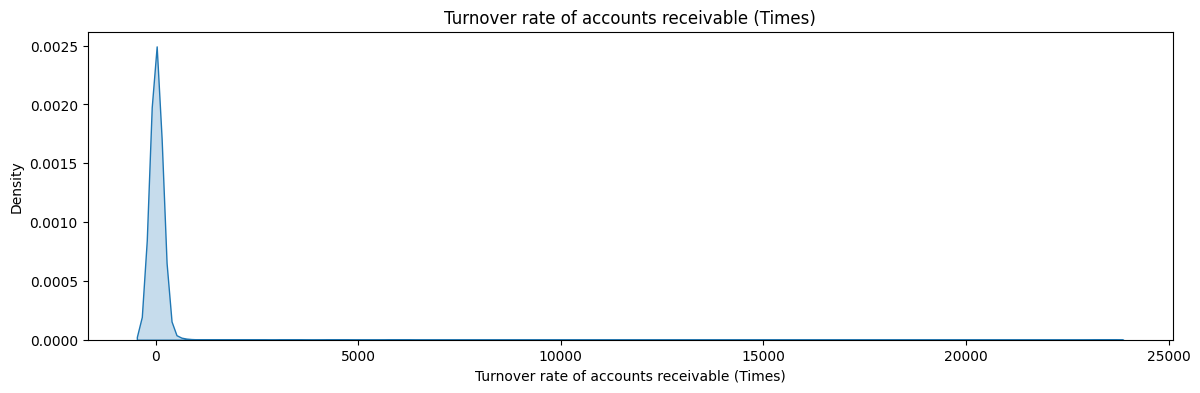

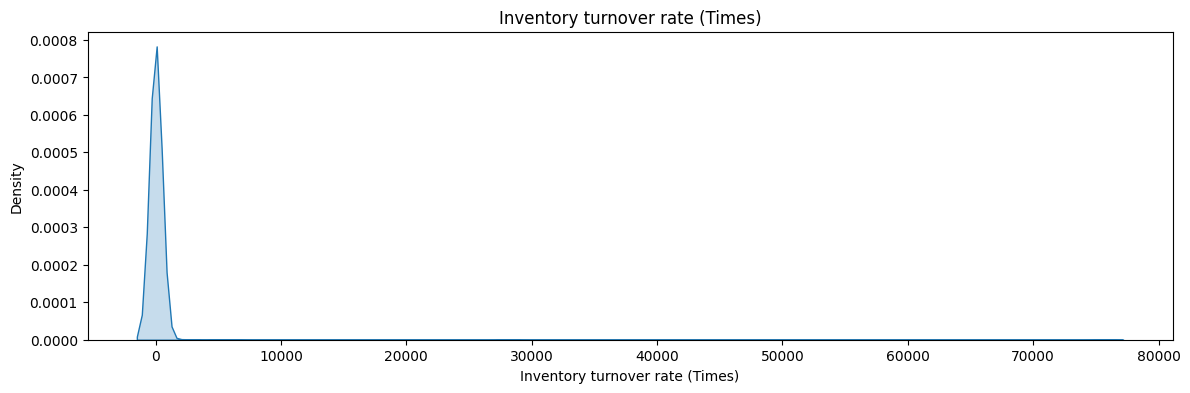

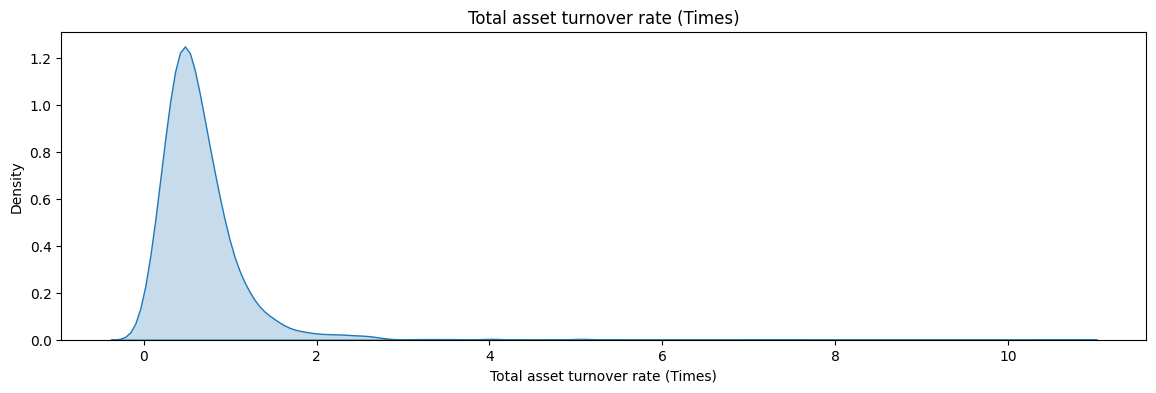

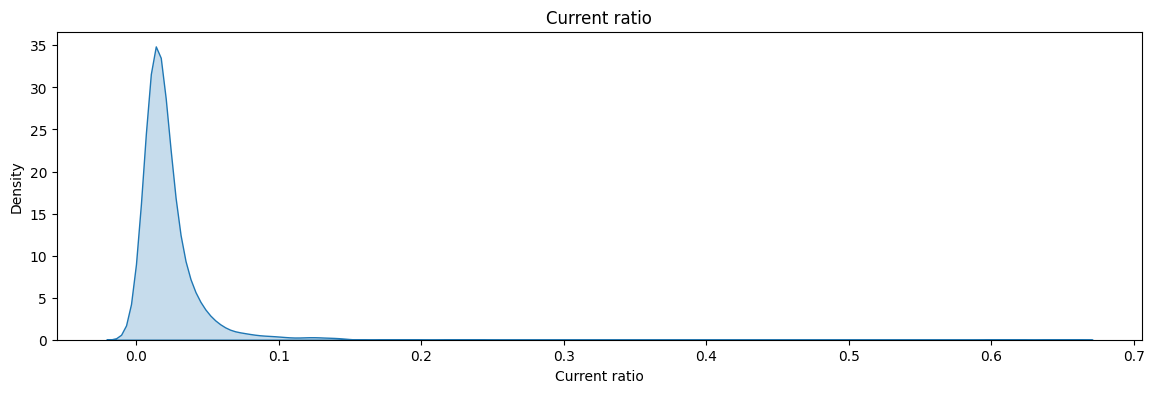

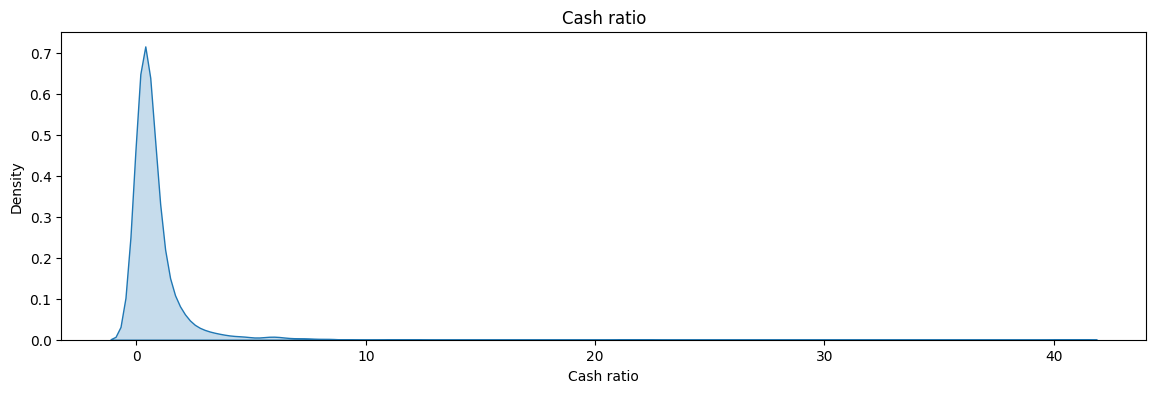

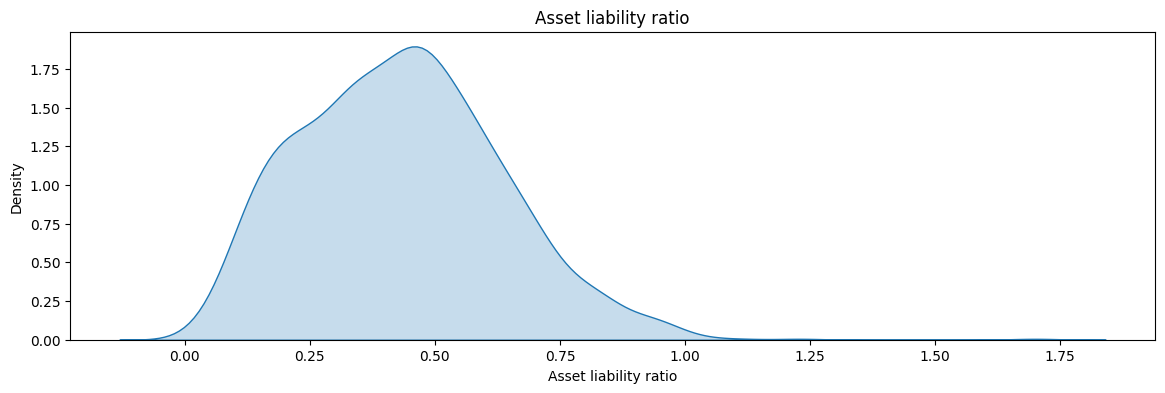

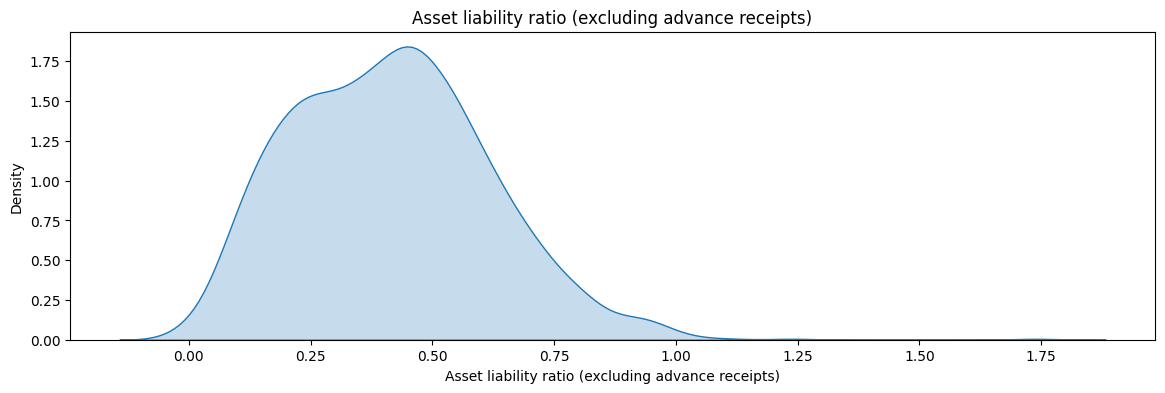

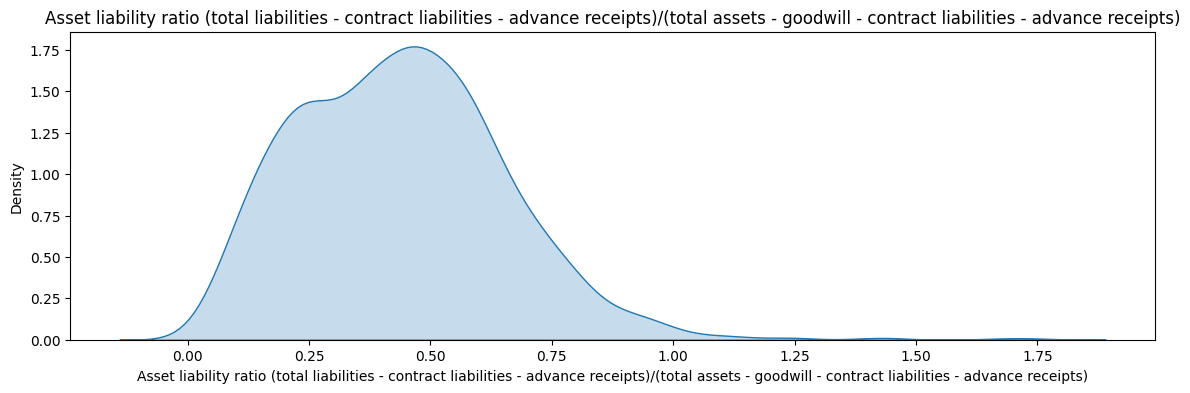

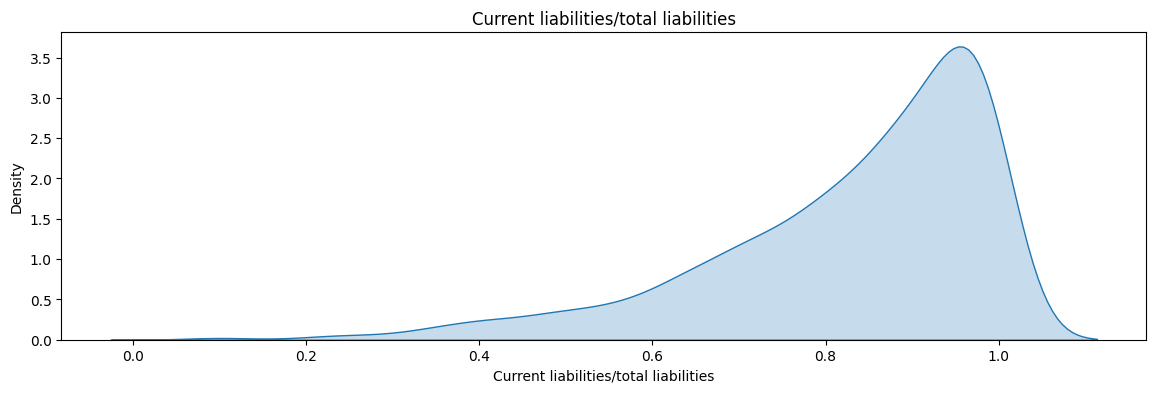

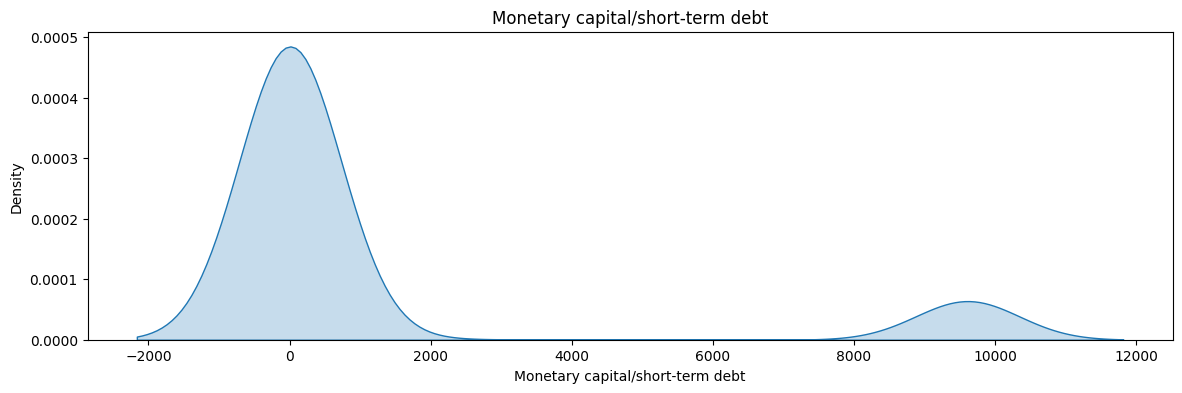

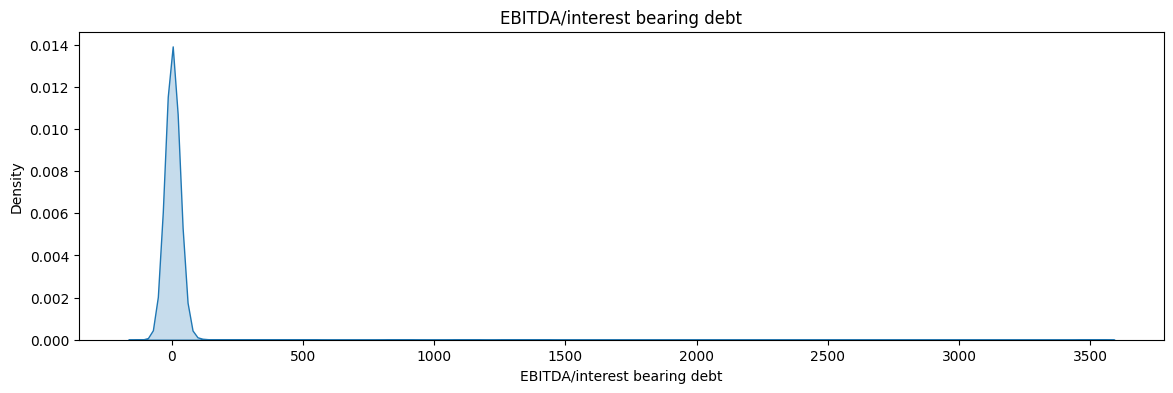

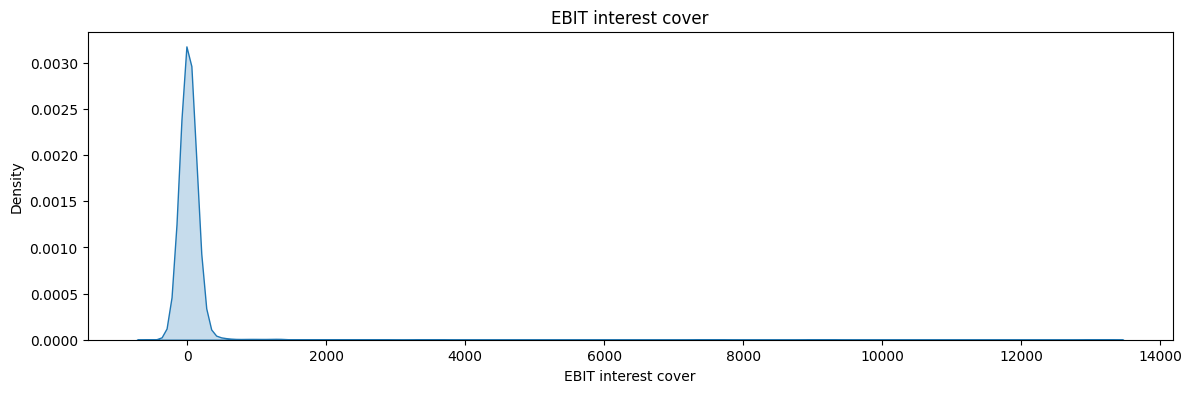

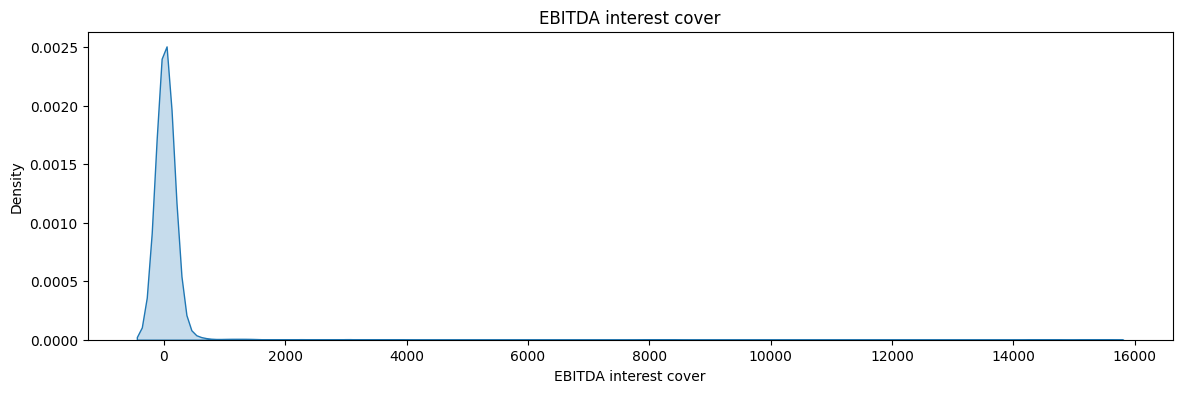

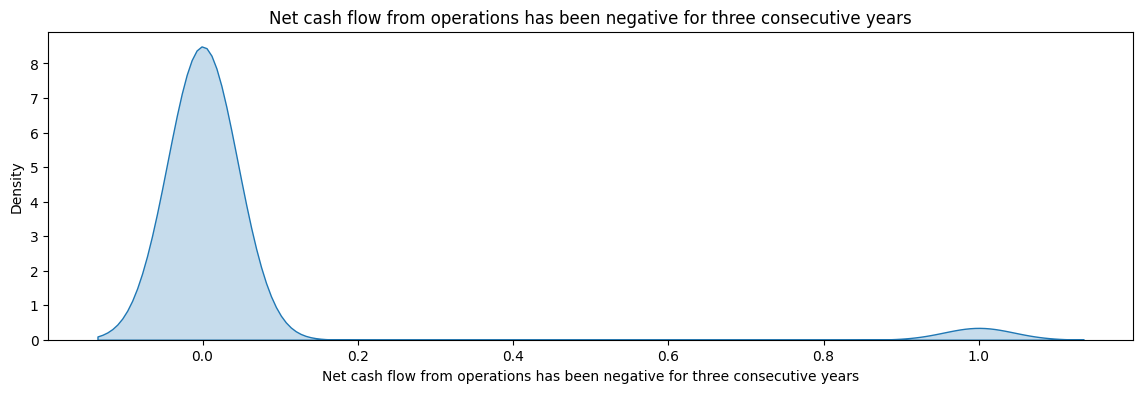

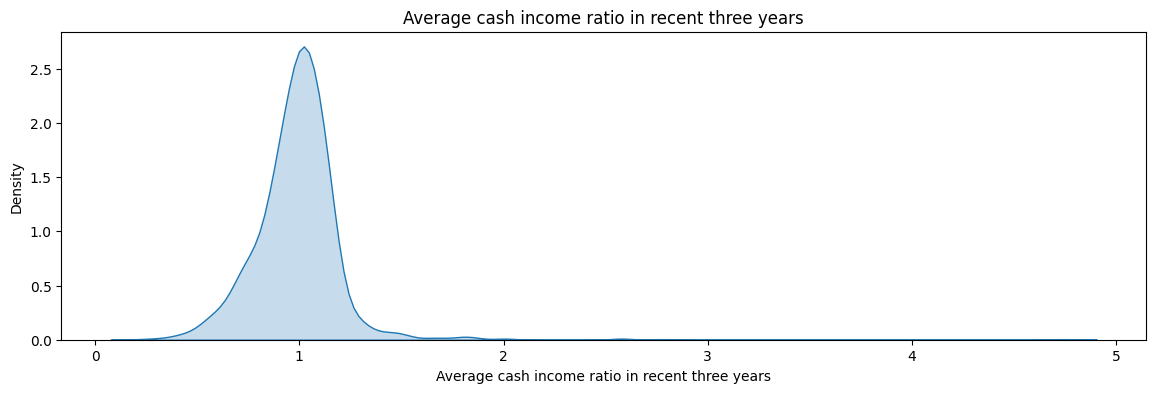

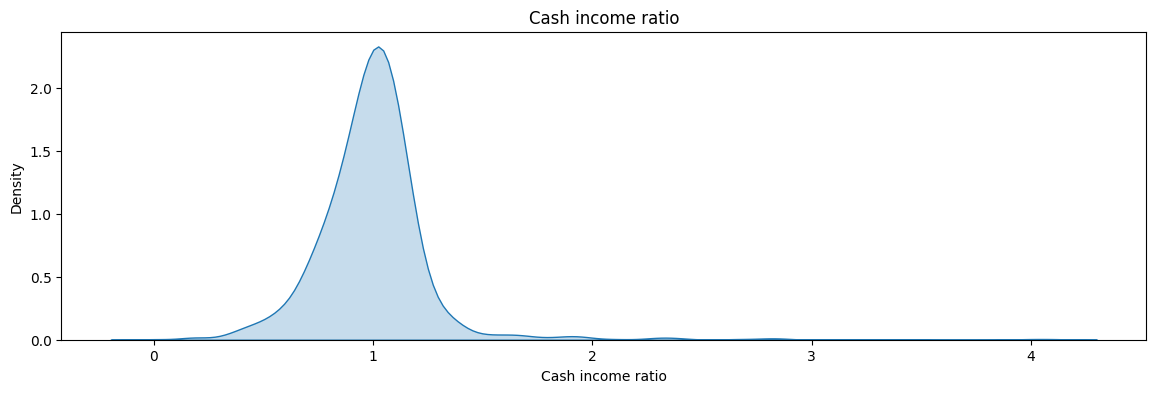

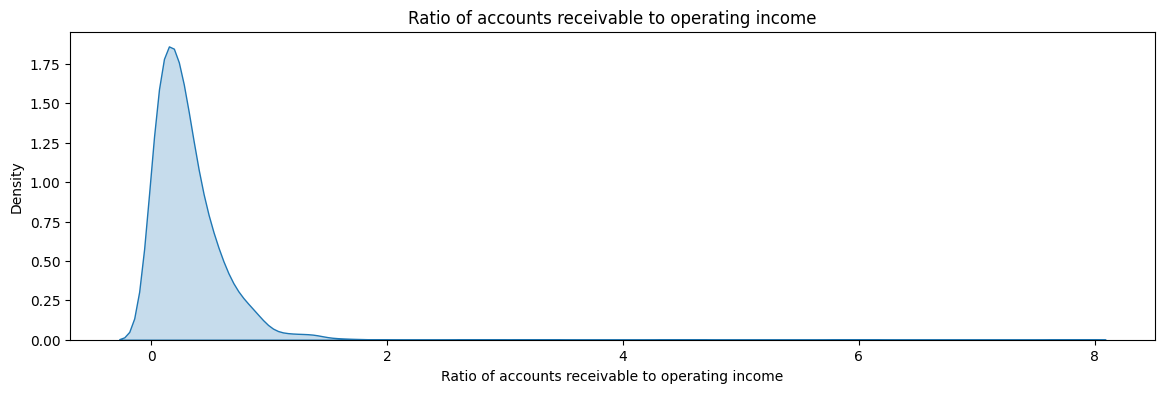

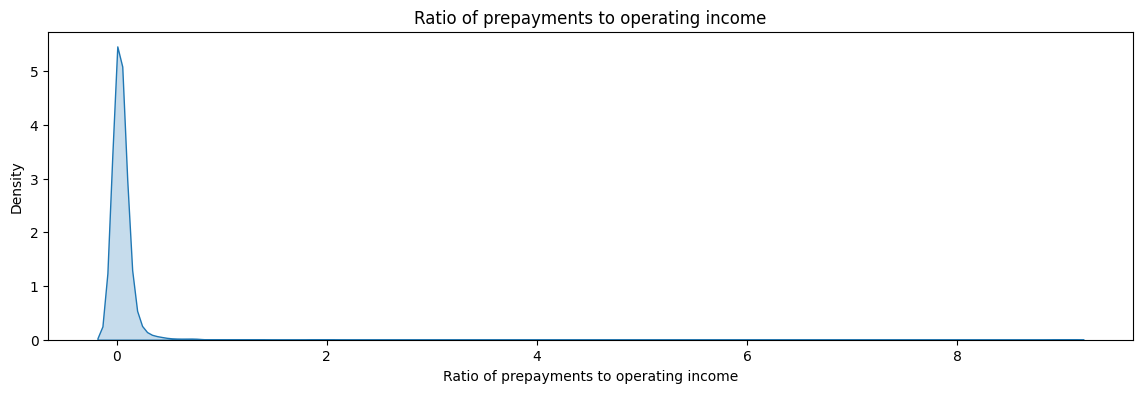

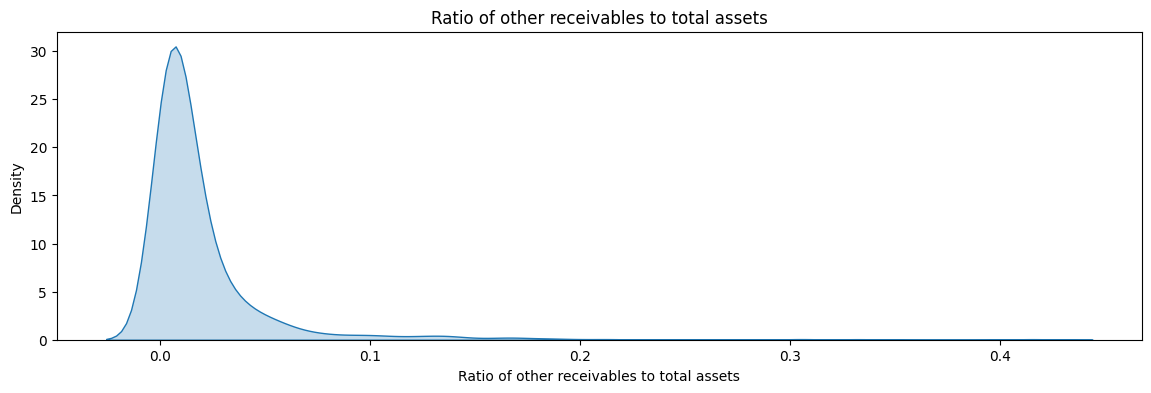

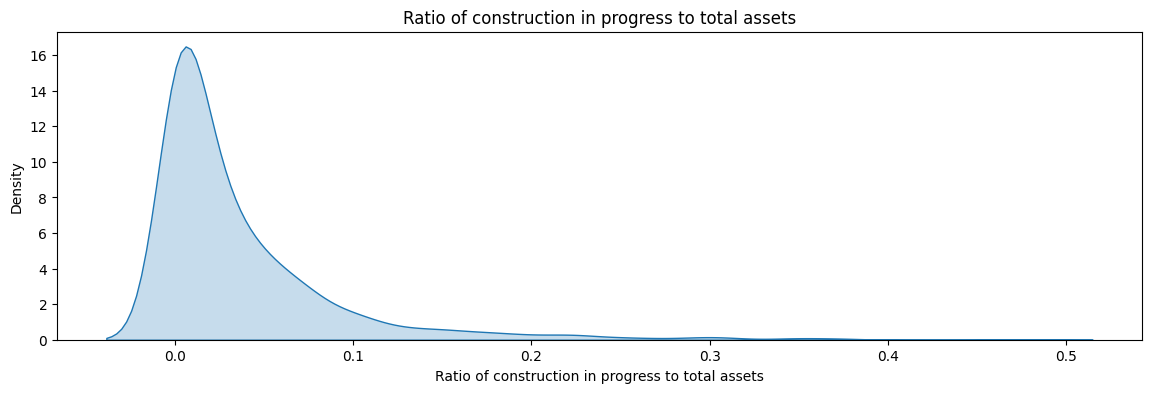

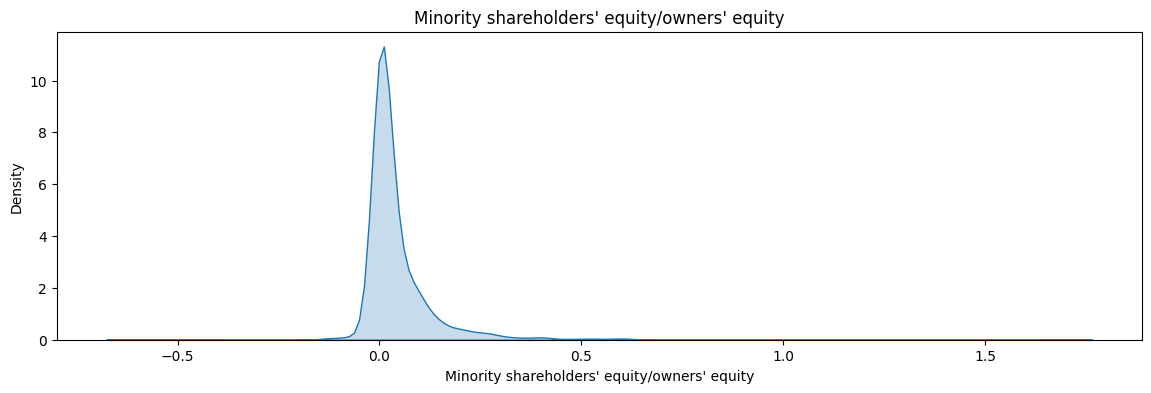

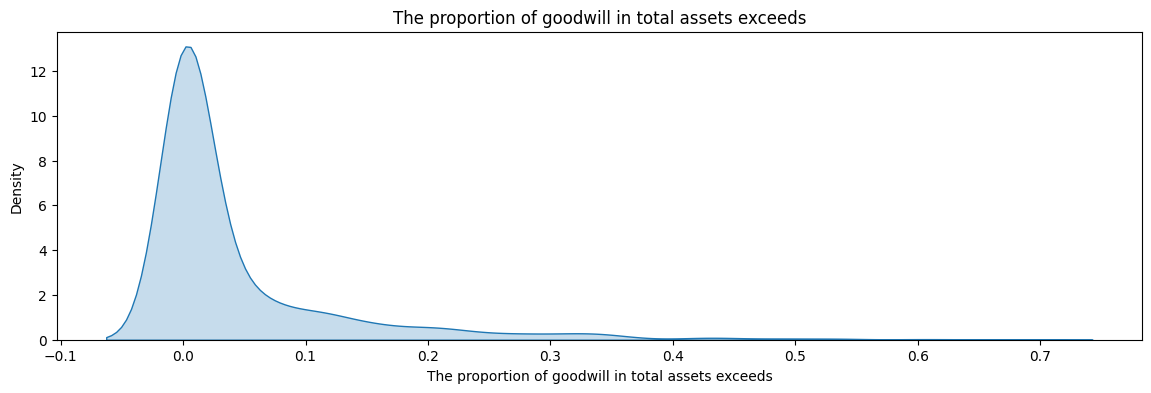

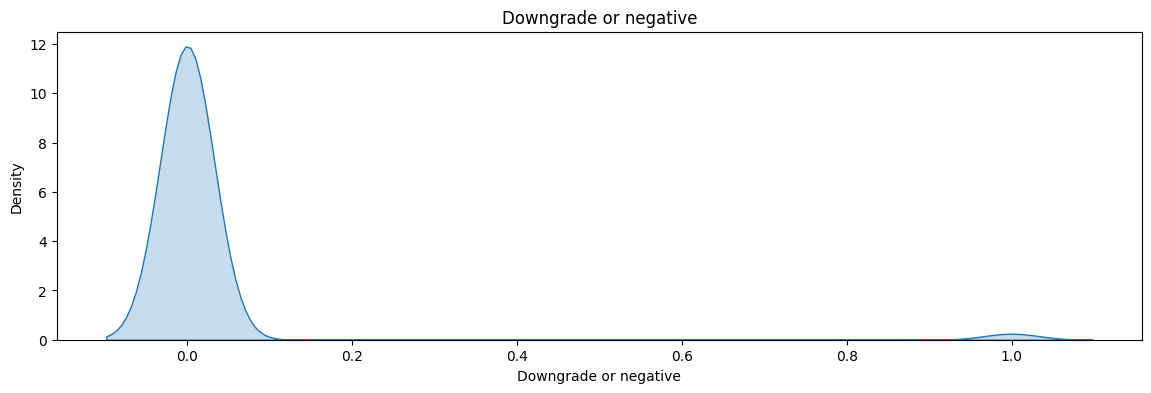

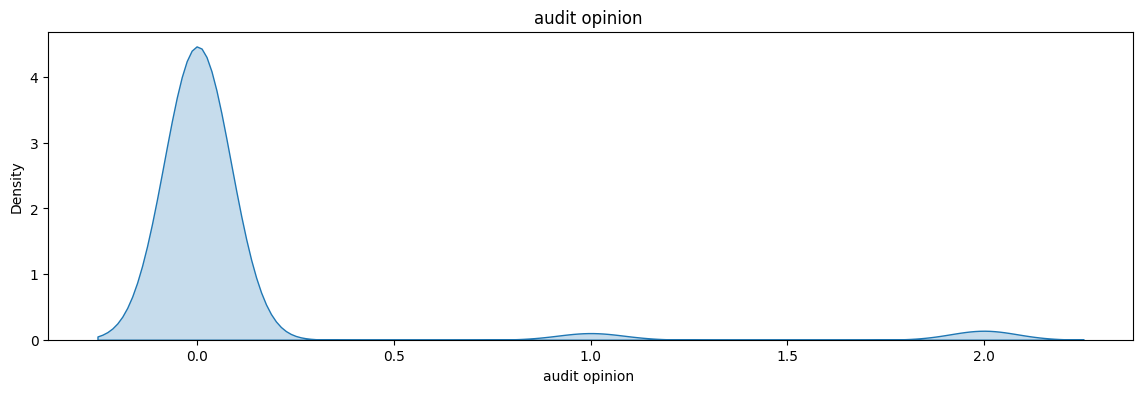

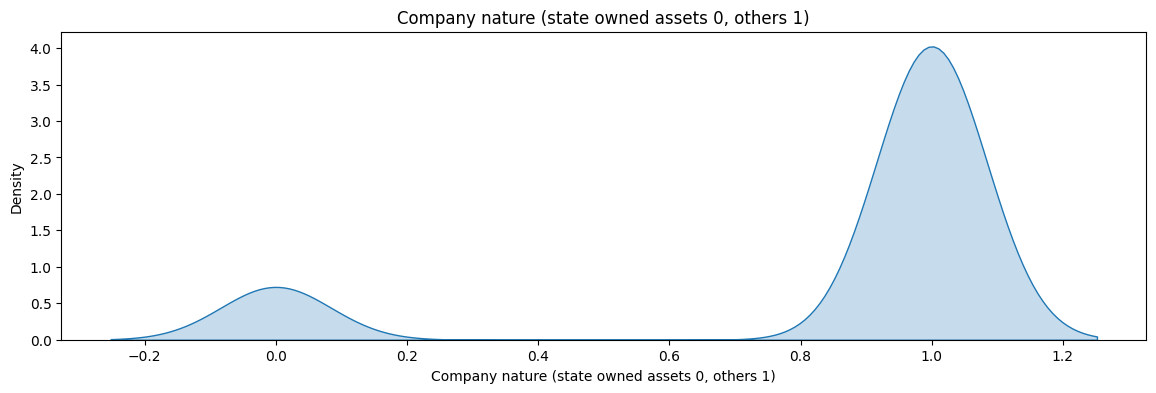

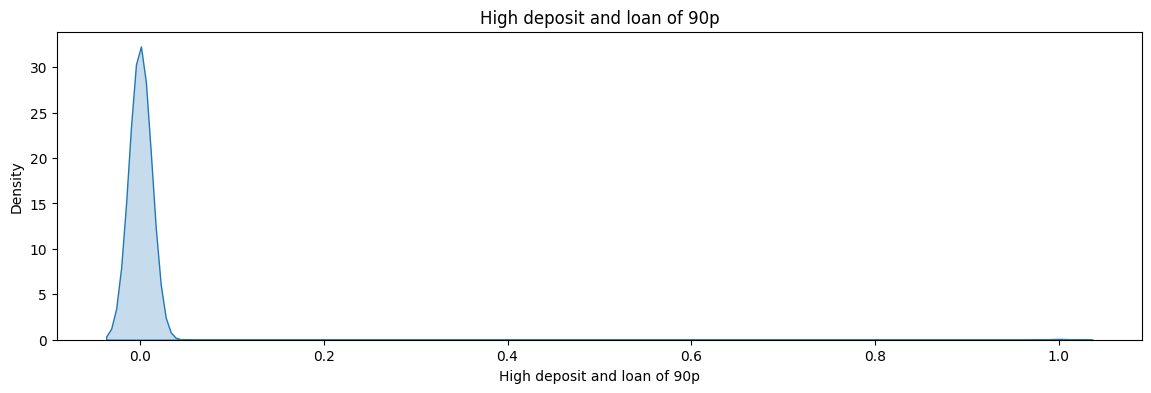

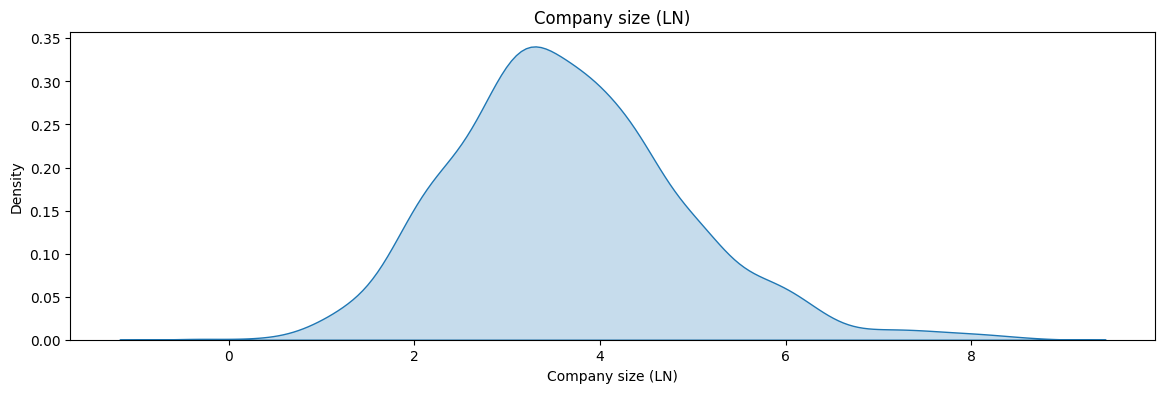

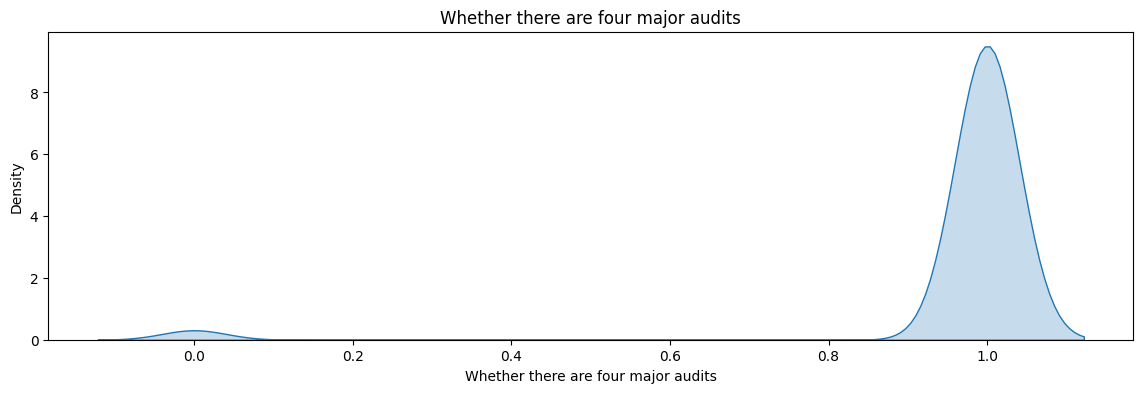

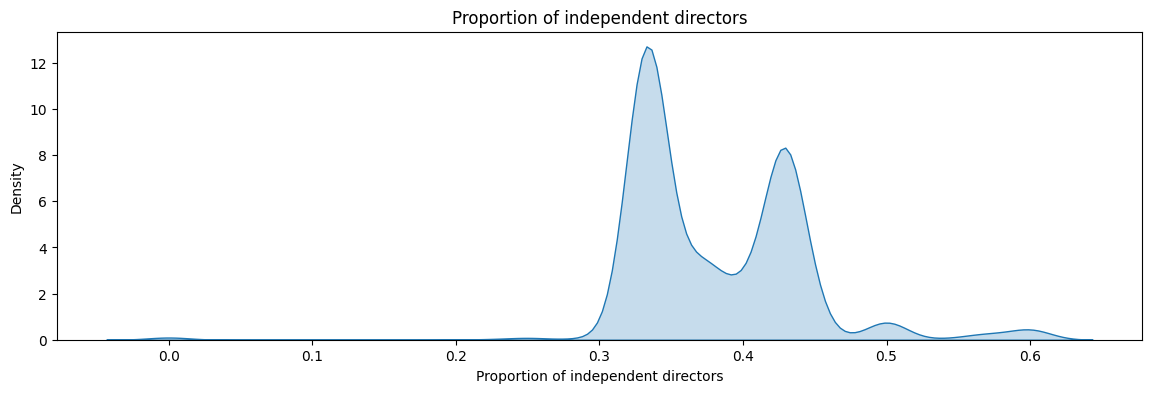

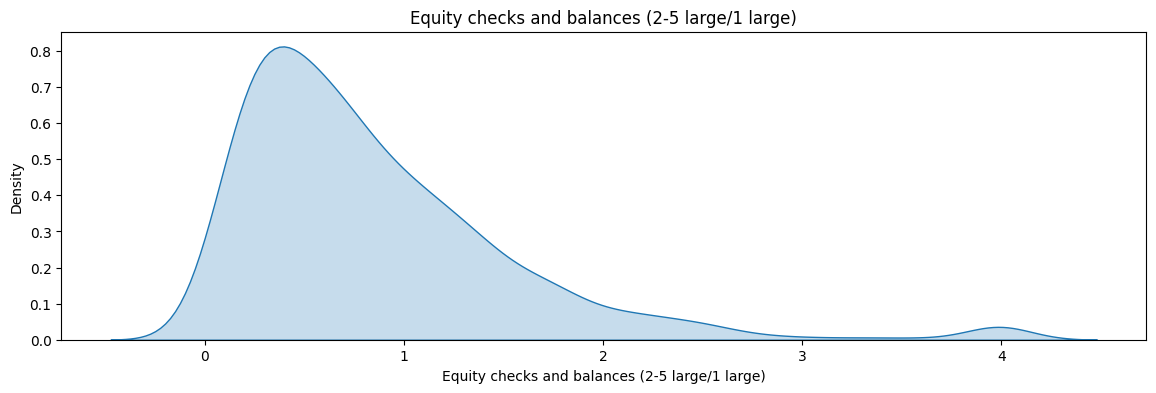

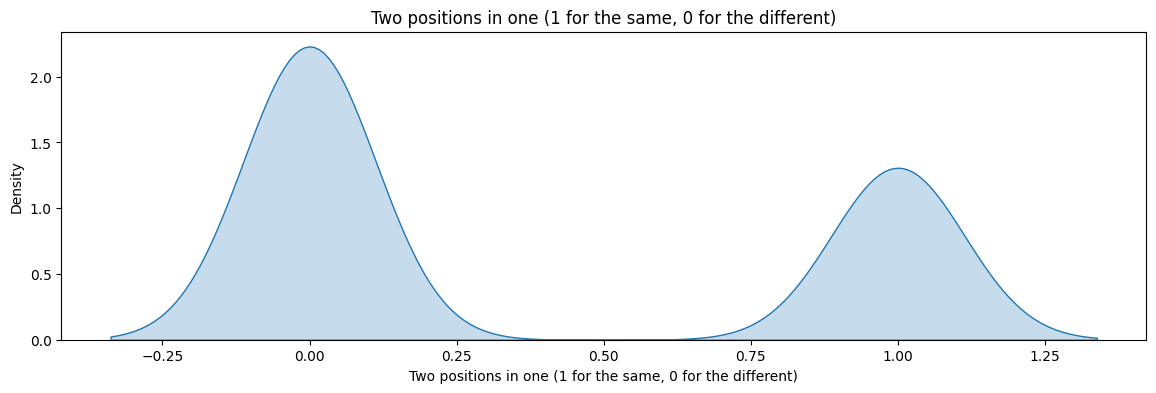

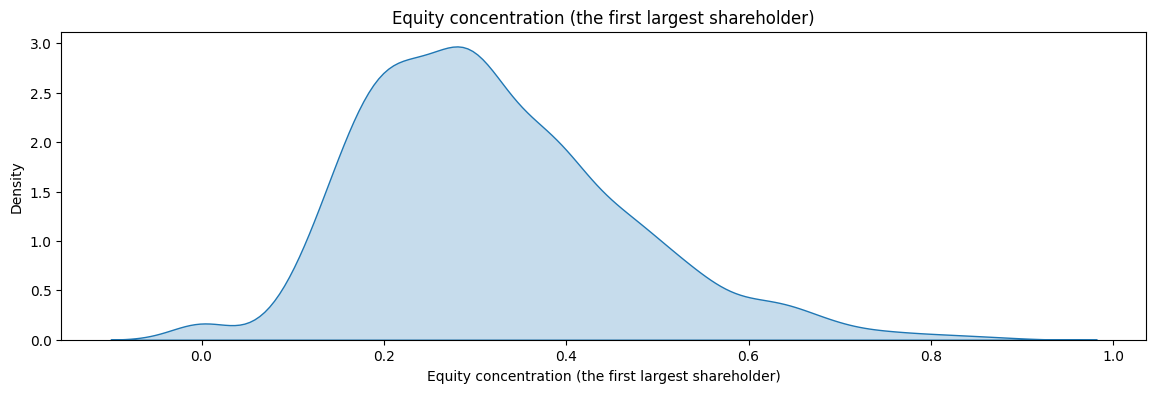

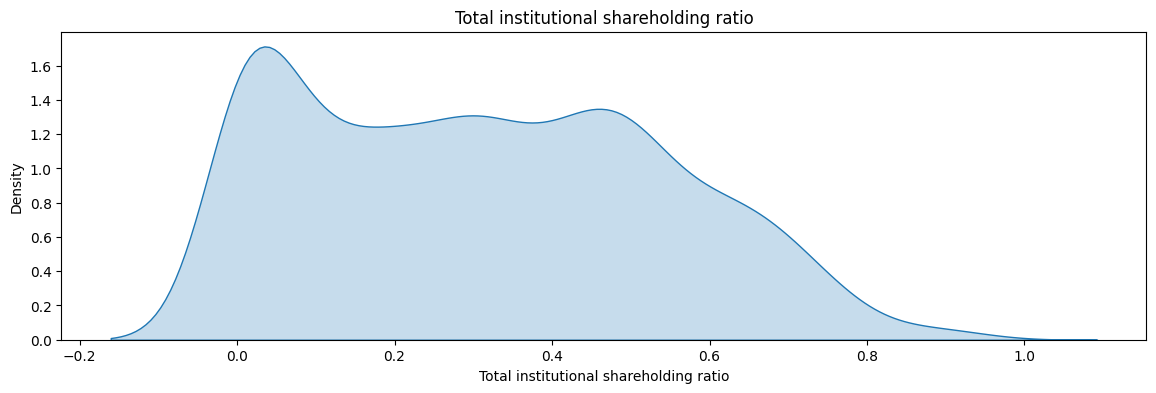

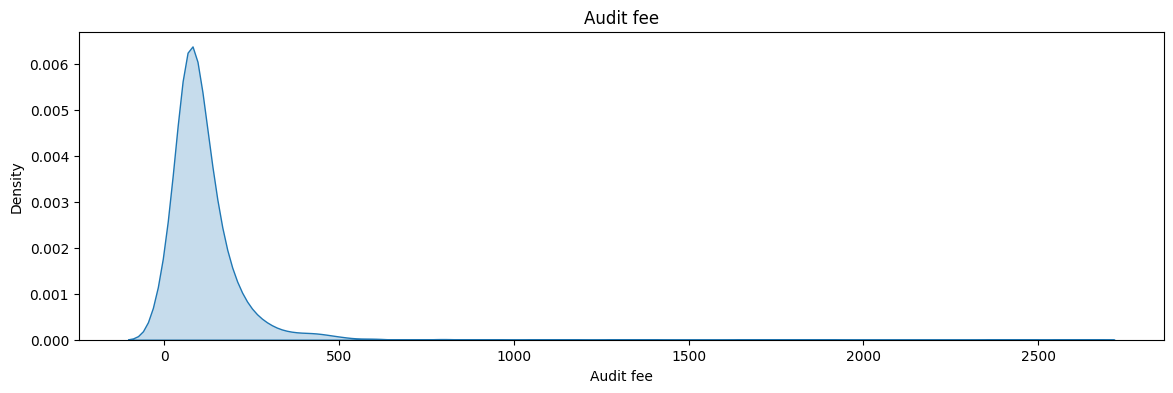

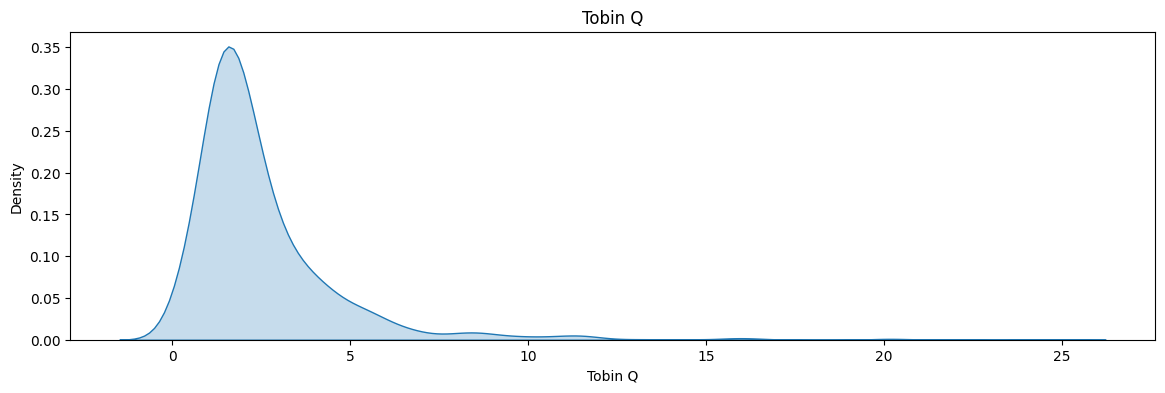

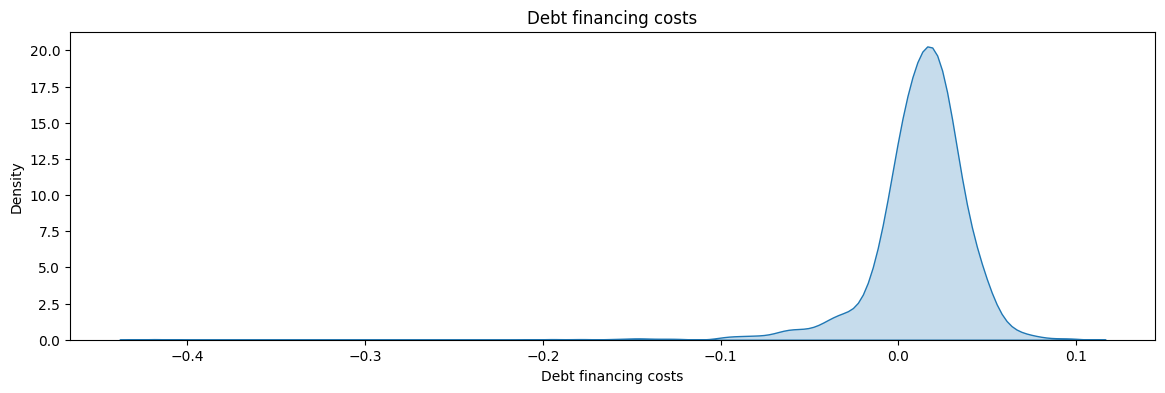

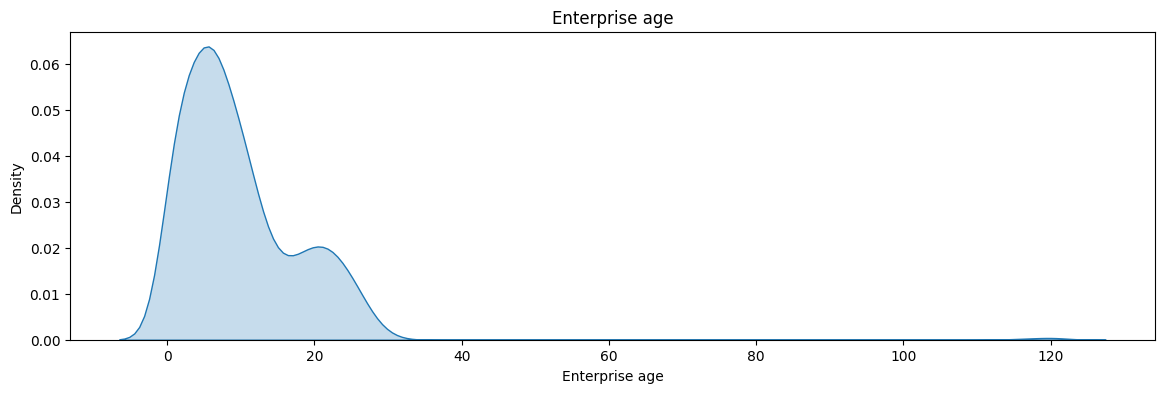

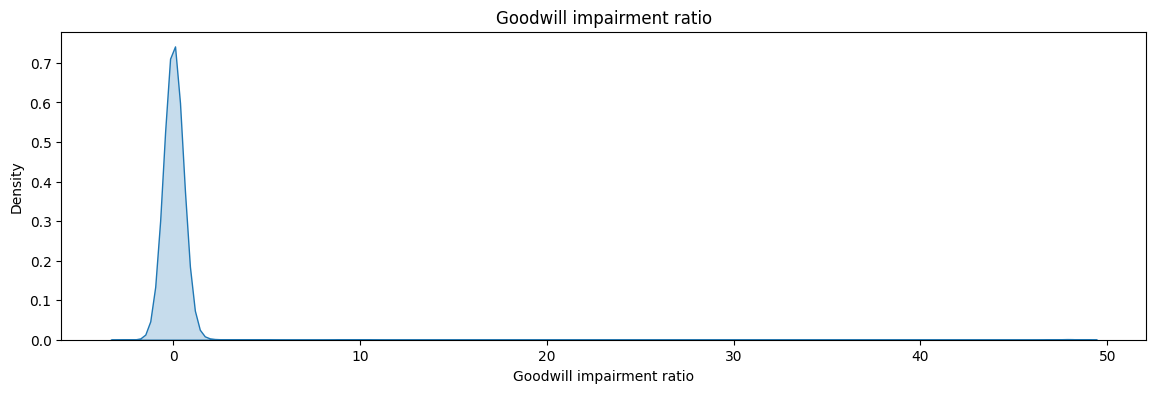

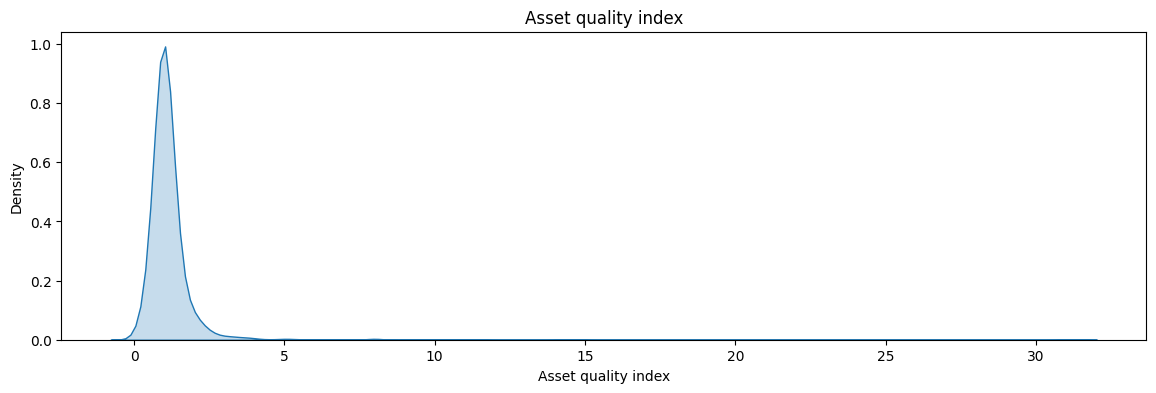

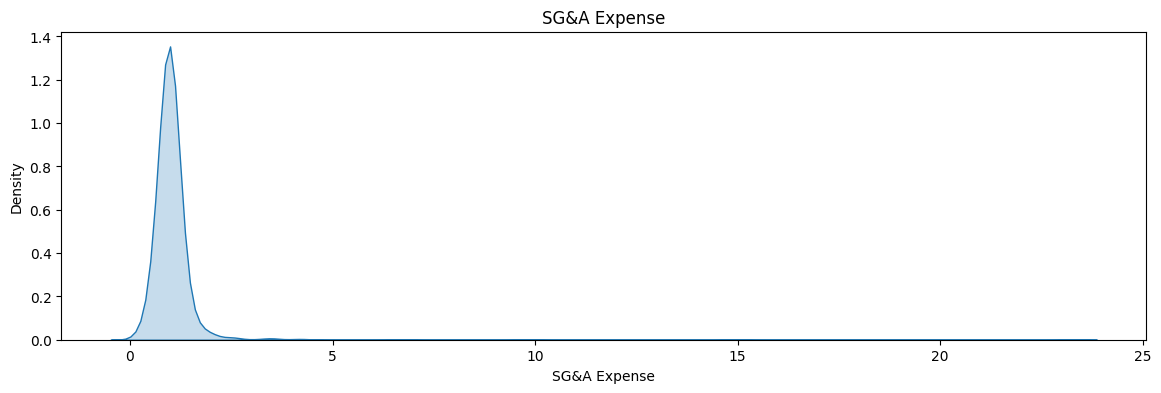

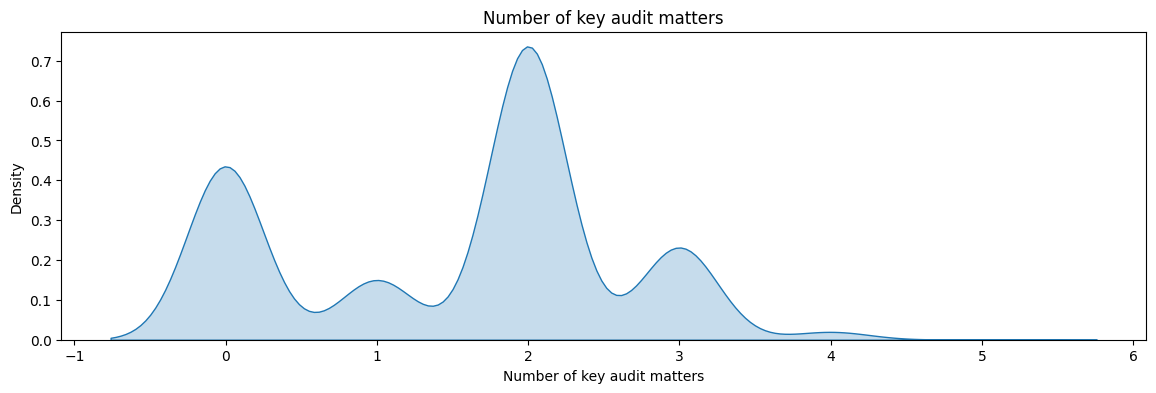

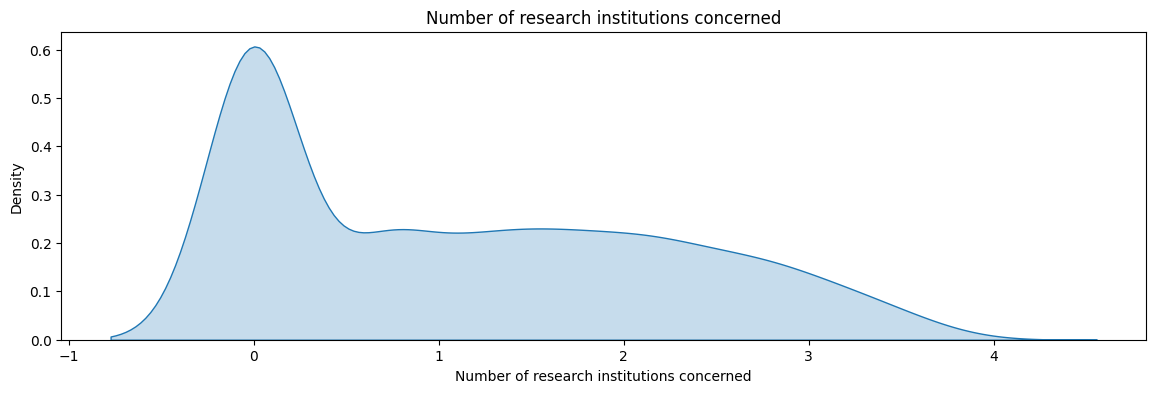

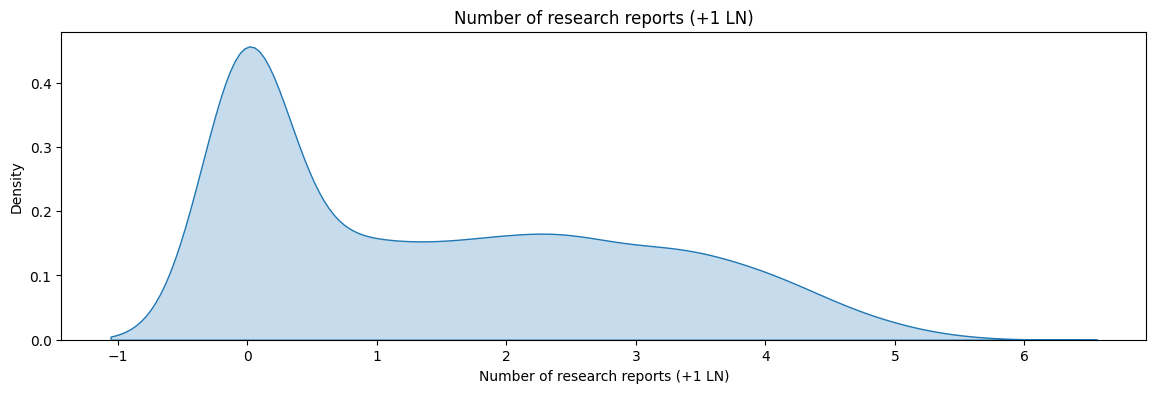

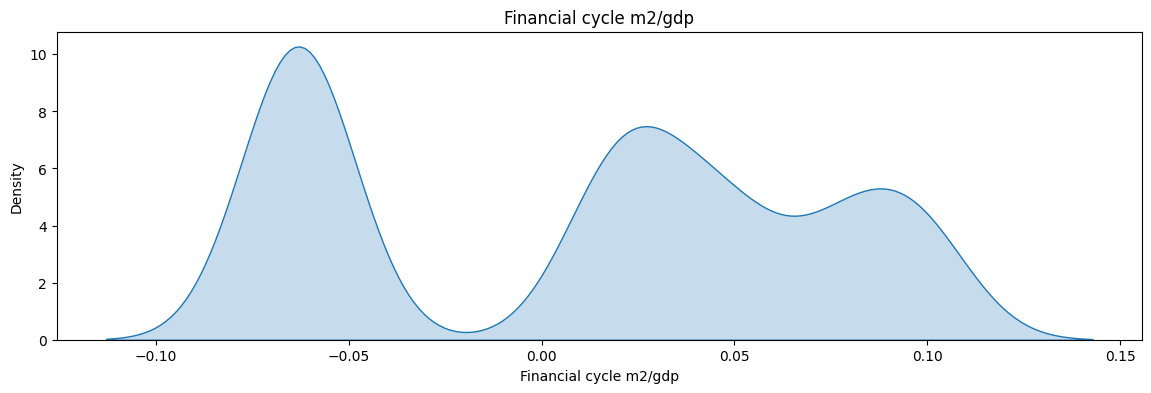

In [3]:
# plotting kde plot for continuous variables to check if they're gaussian
for col in usml_dataset.columns:
    if usml_dataset[col].dtype in ['float64', 'int64']: 
        plt.figure(figsize=(14, 4))
        sns.kdeplot(data=usml_dataset, x=col, fill=True)
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.show() 


In [4]:
# checking for missing values
usml_dataset.isnull().sum()

Stock code                                        0
Z-SCORE                                           0
Share pledge ratio of controlling shareholders    0
Pledge ratio of limited sale shares               0
Pledge ratio of unlimited shares                  0
                                                 ..
SG&A Expense                                      0
Number of key audit matters                       0
Number of research institutions concerned         0
Number of research reports (+1 LN)                0
Financial cycle m2/gdp                            0
Length: 61, dtype: int64

In [5]:
# getting the summary stats for the continuous variables
usml_dataset.describe()

,Z-SCORE,Share pledge ratio of controlling shareholders,Pledge ratio of limited sale shares,Pledge ratio of unlimited shares,Stock Volatility,P/B ratio,Stock price rise and fall in the last year,Annual turnover rate,ST,ROA,...,Tobin Q,Debt financing costs,Enterprise age,Goodwill impairment ratio,Asset quality index,SG&A Expense,Number of key audit matters,Number of research institutions concerned,Number of research reports (+1 LN),Financial cycle m2/gdp
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,...,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,6.387528,0.442647,0.023958,0.108249,47.790971,4.996093,0.166598,6.508094,0.006241,0.054569,...,2.518828,0.012301,9.844739,0.127546,1.174359,1.038347,1.525659,1.115678,1.480534,0.009073
std,13.058135,0.345140,0.080122,0.133797,30.808979,37.637997,0.810960,5.941191,0.078782,0.099736,...,2.230823,0.028476,9.259524,2.207827,1.144908,0.825733,1.086652,1.106885,1.505433,0.061238
min,-35.719400,0.000000,0.000000,0.000000,0.000000,-388.420000,-0.897934,0.000000,0.000000,-0.646738,...,0.068382,-0.418335,0.000000,-1.809115,0.022755,0.100521,0.000000,0.000000,0.000000,-0.070000
25%,1.946499,0.098698,0.000000,0.000000,33.493041,1.684249,-0.251130,2.519008,0.000000,0.025642,...,1.306584,0.002341,4.063194,0.000000,0.865498,0.835212,0.000000,0.000000,0.000000,-0.060000
50%,3.375252,0.440436,0.000000,0.054735,44.070200,2.780000,-0.000876,4.919598,0.000000,0.053198,...,1.909624,0.015666,7.600000,0.000000,1.010221,0.978659,2.000000,0.693147,1.098612,0.020000
75%,6.507198,0.734348,0.000000,0.186299,56.095981,4.799612,0.264761,8.663326,0.000000,0.093961,...,2.962919,0.027199,13.501389,0.000000,1.213713,1.107049,2.000000,2.079442,2.639057,0.050000
max,350.622700,1.000000,0.759900,0.706297,349.684844,1329.872846,8.561111,51.097185,1.000000,0.695737,...,24.674762,0.096737,121.002778,47.904925,31.225937,23.291040,5.000000,3.784190,5.505332,0.100000


In [6]:
# converting the P/E ratio to numeric
usml_dataset['P/E ratio'] = pd.to_numeric(
    usml_dataset['P/E ratio'].str.replace(',', ''), errors='coerce'
)

Explained variance ratio: [0.10548332 0.06247681 0.05246474 0.04767702 0.04028581 0.03440371
 0.03297048 0.02925913 0.02787917 0.02558265 0.02496179 0.02427441
 0.02285951 0.02087757 0.01988998 0.01937352 0.01879482 0.01813764
 0.01765084 0.01716797 0.01632439 0.01625898 0.01593402 0.01578419
 0.01524299 0.01489631 0.01434055 0.01367604 0.01363928 0.0132004
 0.01231476 0.01193714 0.01159829 0.01151968 0.0106611  0.01041036
 0.01013721 0.00965239 0.00946578 0.00886543 0.00880108 0.0083514
 0.00777017 0.00743036 0.0072934 ]
Cumulative explained variance: [0.10548332 0.16796012 0.22042487 0.26810189 0.3083877  0.34279141
 0.37576189 0.40502101 0.43290018 0.45848283 0.48344463 0.50771903
 0.53057854 0.55145611 0.57134609 0.59071961 0.60951443 0.62765207
 0.64530292 0.66247088 0.67879528 0.69505426 0.71098828 0.72677247
 0.74201546 0.75691178 0.77125232 0.78492836 0.79856764 0.81176805
 0.8240828  0.83601995 0.84761824 0.85913792 0.86979902 0.88020938
 0.89034659 0.89999898 0.90946476 0.918

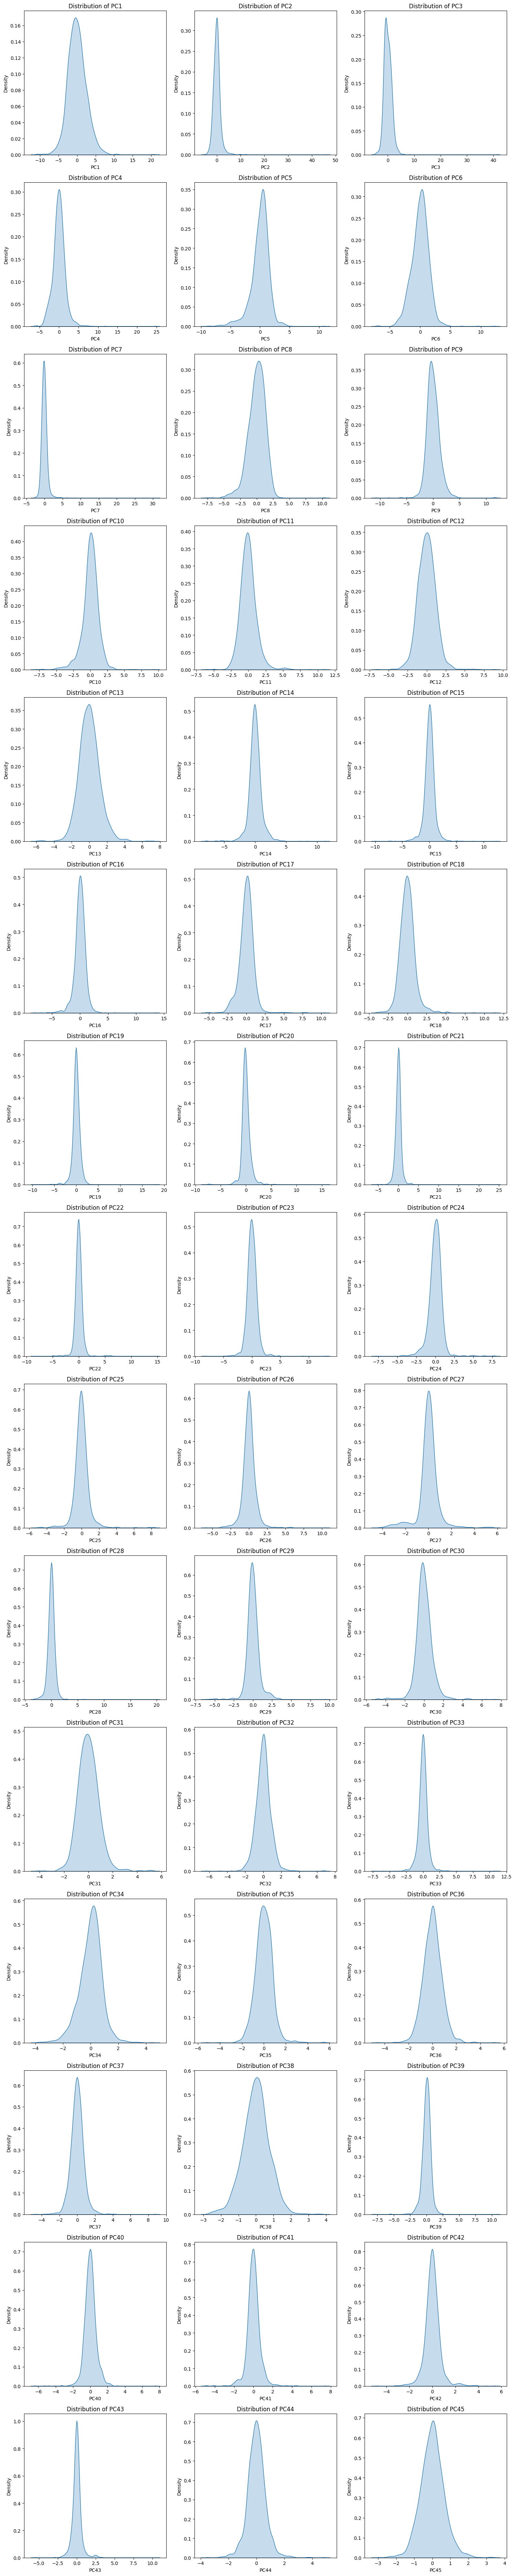

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# standardizing numerical columns
numeric_columns = usml_dataset.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(usml_dataset[numeric_columns])

# applying PCA
pca = PCA(n_components=45)  
pca_data = pca.fit_transform(scaled_data)

# coverting PCA data to a dataframe
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# checking the cummulative explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())
print(f'\nShape of PCA data: {pca_data.shape}')

# generating KDE plots for the PCA data
num_plots = len(pca_df.columns)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols) 
plt.figure(figsize=(15, num_rows * 5)) 

# creating the plots
for i, column in enumerate(pca_df.columns):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.kdeplot(data=pca_df, x=column, fill=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [8]:
from scipy.stats import shapiro

# hash-map to store results
shapiro_stats = {}

# performing Shapiro-Wilk test
for column in pca_df.columns:
    stat, _ = shapiro(pca_df[column]) 
    shapiro_stats[column] = stat      

# converting results to a dataframe
shapiro_stats_df = pd.DataFrame(shapiro_stats.items(), columns=['PCA Component', 'Test Statistic'])

# printing values that have less than 70% gaussian score
for key, val in shapiro_stats.items():
    if val < 0.7:
        print(key, val)

PC2 0.6149763464927673
PC3 0.6951578855514526
PC7 0.36569029092788696
PC21 0.5902901887893677
PC22 0.6252826452255249
PC28 0.6181738376617432


In [9]:
from scipy.stats import shapiro
import numpy as np

# columns with low Shapiro-Wilk scores
columns_to_transform = ['PC2', 'PC3', 'PC7', 'PC21', 'PC22', 'PC28']

# Dictionary to store Shapiro-Wilk scores after transformations
transformation_scores = {col: {} for col in columns_to_transform}

# Apply transformations
for col in columns_to_transform:
    shifted_col = pca_df[col] - pca_df[col].min() + 1
    
    # log transformation
    log_transformed = np.log1p(shifted_col)
    stat_log, _ = shapiro(log_transformed)
    transformation_scores[col]['Log'] = stat_log

    # Square root transformation
    sqrt_transformed = np.sqrt(shifted_col)
    stat_sqrt, _ = shapiro(sqrt_transformed)
    transformation_scores[col]['Sqrt'] = stat_sqrt

    # Exponential transformation
    exp_transformed = np.exp(shifted_col)
    stat_exp, _ = shapiro(exp_transformed)
    transformation_scores[col]['Exp'] = stat_exp

# Converting results to a dataframe
transformation_scores_df = pd.DataFrame(transformation_scores).T
transformation_scores_df


,Log,Sqrt,Exp
PC2,0.927650,0.848790,0.008753
PC3,0.953418,0.902804,0.008753
PC7,0.803864,0.645224,0.009268
PC21,0.735451,0.718647,0.008753
PC22,0.577545,0.627250,0.008921
PC28,0.836878,0.786509,0.008754


In [10]:
import numpy as np

# Applying log transformation to PC2, PC3, PC21, and PC28 since they yield the best results 
for col in ['PC2', 'PC3', 'PC21', 'PC28', 'PC7']:
    # Shift values to ensure all are positive
    shifted_col = pca_df[col] - pca_df[col].min() + 1
    pca_df[col] = np.log1p(shifted_col)

# Applying square root transformation to PC22
shifted_col = pca_df['PC22'] - pca_df['PC22'].min() + 1
pca_df['PC22'] = np.sqrt(shifted_col)

In [11]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Fit GMM
gmm = GaussianMixture(n_components= 3, random_state=42)
gmm.fit(pca_df)

# Get probabilities of each data point belonging to each component
proba = gmm.predict_proba(pca_df)

# Setting a probability threshold of 0.9
threshold = 0.9

# conditional statement to check if a datapoint is anomaly or not
pca_df['Anomaly'] = np.max(proba, axis=1) < threshold

# displaying the value counts of the classification
pca_df['Anomaly'].value_counts()


C:\Users\prana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


False    1423
True       19
Name: Anomaly, dtype: int64

In [12]:
# printing out the datapoints that has been identified as anomalies
anomalies = pca_df[pca_df['Anomaly'] == True]
anomalies


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,Anomaly
172,1.565666,1.855554,2.038095,1.511957,1.092788,1.178850,1.403373,-0.485535,-0.220550,1.051776,...,0.653242,-0.184318,-0.289107,0.215174,-0.731244,0.459512,0.032313,0.199630,-0.777360,True
214,1.068193,1.997373,2.144450,-0.199335,-1.591544,0.284001,1.480479,-2.126304,-1.080920,0.130911,...,-0.328570,0.197055,-1.130428,0.221438,-0.794743,0.967961,0.564468,-0.793968,-0.088969,True
361,2.415578,1.991382,1.999995,0.002532,-0.225467,-0.106756,1.474606,-0.622662,0.562285,-0.361178,...,0.014151,0.292286,0.252197,0.385904,-0.226735,-0.238185,0.017398,0.848461,-0.837752,True
378,1.340370,2.026303,1.932269,0.986067,1.477688,0.317656,1.642305,0.205086,-2.669703,0.619547,...,-0.276959,-0.826286,0.334983,0.554216,0.146645,-0.285135,-0.124735,-0.071921,-0.336107,True
436,0.302104,1.811304,1.985774,-0.452625,1.024883,-1.385081,1.629274,0.545253,-0.779898,0.027030,...,-1.305259,0.320491,0.929805,0.050713,0.980053,-0.727432,-0.023216,-0.093294,0.634370,True
438,1.850594,1.996225,2.061515,-2.439438,-2.762917,1.978398,1.374241,0.726437,-0.100830,0.956615,...,0.168434,0.362083,0.051876,0.244475,-0.023745,-0.582033,0.240395,0.032454,0.912572,True
562,1.113066,2.083501,1.745682,0.296066,0.312341,-0.508316,1.621915,0.979205,-1.400108,0.359052,...,0.493333,-0.031349,-0.171225,0.096627,-1.478604,0.834919,0.279174,0.405348,-1.075434,True
572,1.302259,2.046525,2.034533,-1.851046,-4.479477,2.056508,1.453897,0.891915,-0.090819,0.695655,...,0.135143,0.737030,0.311820,0.704769,0.147892,0.538962,0.253409,-0.054081,0.007567,True
633,2.371690,1.956731,1.918872,-1.367566,-0.412086,-1.123270,1.625201,1.636067,-0.510875,0.032967,...,-0.660263,0.775199,0.947225,-0.202681,0.602036,-0.408884,0.285021,-0.032082,0.013873,True
707,1.293883,2.077251,1.780736,-0.513270,1.230925,0.854071,1.470721,-0.304887,-1.507560,0.350747,...,-0.691232,0.070782,0.532559,-0.397942,0.400382,-0.189730,-0.021208,-0.543262,0.594820,True


In [15]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest
isolation_forest = IsolationForest(random_state=42)
pca_df['Predicted_Anomaly'] = isolation_forest.fit_predict(pca_df.drop(columns=['Anomaly']))

# Convert to boolean
pca_df['Predicted_Anomaly'] = pca_df['Predicted_Anomaly'] == -1


In [19]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model to the data (excluding the 'Anomaly' column)
iso_forest.fit(pca_df.drop(columns=['Anomaly'], errors='ignore'))

# Predict anomalies
# IsolationForest assigns -1 to anomalies and 1 to normal points
pca_df['Predicted_Anomaly'] = iso_forest.predict(pca_df.drop(columns=['Anomaly'], errors='ignore'))

# Convert predictions to a boolean anomaly flag (True for anomalies, False otherwise)
pca_df['Predicted_Anomaly'] = pca_df['Predicted_Anomaly'] == -1

# Display the first few rows of the DataFrame
pca_df.head()


C:\Users\prana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,Anomaly,Predicted_Anomaly
0,-2.222839,1.348835,2.365852,2.427671,-0.349366,-1.988799,1.844510,-0.931103,-0.775706,0.263700,...,-0.533103,-0.780372,1.681767,-2.090678,-0.925565,-0.897347,-0.706793,0.615356,False,False
1,-1.174155,1.711963,2.265009,1.585876,0.743361,1.909095,1.368361,-1.798205,-1.325183,0.386787,...,-0.733770,-0.153131,0.510076,-0.069115,0.156331,0.541335,1.027941,0.781232,False,False
2,-0.297032,1.684011,2.211484,2.741496,0.311701,1.051528,1.531864,-0.043921,-1.162667,0.902923,...,-0.099166,0.255162,-0.034584,0.604646,0.433865,0.952509,1.752965,0.080063,False,False
3,-0.773793,1.354359,2.382429,1.651468,0.064882,0.119451,1.853776,-0.708566,-0.978318,-0.154538,...,0.410083,-0.228300,1.546249,-0.981423,-1.223333,-1.536155,-0.819687,0.027389,False,False
4,0.971401,1.690835,2.400114,0.711441,-2.109490,-0.415324,1.611441,-1.457399,-1.522161,-2.611567,...,-0.347658,1.434572,-1.320751,-0.389238,1.475547,0.390156,-0.062707,-0.695881,False,False


In [20]:
# displaying the value counts of the classification for Isolation Forest
pca_df['Predicted_Anomaly'].value_counts()

False    1297
True      145
Name: Predicted_Anomaly, dtype: int64

In [23]:
# checking how many labels have been predicted correctly (has an accuracy of 56%)
anomalies_if = pca_df[pca_df['Predicted_Anomaly'] == True]
print(anomalies_if.index > 1177)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
